<a href="https://colab.research.google.com/github/EricAlcarazdelPico/deep-learning-with-python-personal-workflow/blob/main/linear_classifier_in_pure_TensorFlow_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### An end-to-end example: A linear classifier in pure TensorFlow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**Generating two classes of random points in a 2D plane**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

#Stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

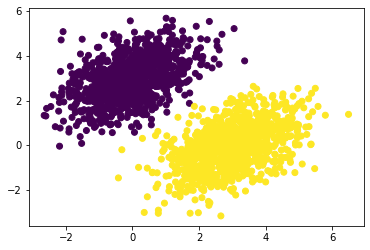

In [ ]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    # Forward pass
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # Backward pass: update weights and bias
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**Training the model**

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.7713
Loss at step 1: 0.1781
Loss at step 2: 0.1081
Loss at step 3: 0.0954
Loss at step 4: 0.0889
Loss at step 5: 0.0835
Loss at step 6: 0.0785
Loss at step 7: 0.0740
Loss at step 8: 0.0698
Loss at step 9: 0.0660
Loss at step 10: 0.0625
Loss at step 11: 0.0593
Loss at step 12: 0.0564
Loss at step 13: 0.0537
Loss at step 14: 0.0513
Loss at step 15: 0.0490
Loss at step 16: 0.0470
Loss at step 17: 0.0451
Loss at step 18: 0.0433
Loss at step 19: 0.0417
Loss at step 20: 0.0403
Loss at step 21: 0.0390
Loss at step 22: 0.0377
Loss at step 23: 0.0366
Loss at step 24: 0.0356
Loss at step 25: 0.0346
Loss at step 26: 0.0338
Loss at step 27: 0.0330
Loss at step 28: 0.0323
Loss at step 29: 0.0316
Loss at step 30: 0.0310
Loss at step 31: 0.0304
Loss at step 32: 0.0299
Loss at step 33: 0.0295
Loss at step 34: 0.0290
Loss at step 35: 0.0286
Loss at step 36: 0.0283
Loss at step 37: 0.0280
Loss at step 38: 0.0276
Loss at step 39: 0.0274


**Predictions with input data**

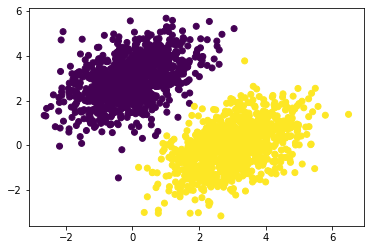

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

**Model visualized as a line**

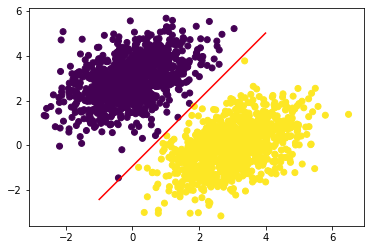

In [ ]:
x = np.linspace(-1, 4, 100)
# w1 * x + w2 * y + b = 0.5
# New predictions:
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)